**SPOTIFY RECOMMENDER**

In [1]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

# Reemplaza con tus credenciales
client_id = "fbcc027e4a464e239fb45911a81f5103"
client_secret = "2dc10949ba6a436ebfc6979eab263668"

# Autenticación
auth_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
spotify = spotipy.Spotify(auth_manager=auth_manager)

no executar la pròxima cel·la

In [ ]:
import pandas as pd

# Lista de IDs de las playlists (puedes agregar más IDs aquí)
playlist_ids = [
    "3zdxwTQrpdBbSWW0AAo9bK", # Ejemplo: la meva d'estrelletes rnb
    "1qcr3J1cHHDeeZmYvfDcOO",  
    "6atOP7u9r3NHlemVa2FmBa",  
    "6Xomhg7OlkFqsh31qDTGEv",
    "2OJemWctSEA6dXkBYK1Czd",
    "4Kb3D1UvDARKHBUzZguuLb",
    "644KTV9Q2LHxhewwTKk1Fj",
    #"4JSmsAazziRxrmNlmS8Lek",
    "3vAg3PErZK53Yncq63xK1d",
    "4PN4MV0i3xC4j0jS1vfc5I",
    "6s9yM8wqPPpABG4zqSEXUZ",
    "2UQKnU1aQWeTEsO0YrpMPD",
    "06P03btu9eXF6m36l43ewK",
    "5bLAtwJjs5jVyXruXfay7q",
    "3mECC4HNkIRqpsahV68cKL",
    "5a7w6B5lrmkPm2gt2RdbNJ",
    "1BsKEsRq6h7nLuWYQy1zIU",
    "15zXAw5C6wIdknsqpHUzVE",
    "5TGR44P9MHxJ12tmKIgep9",
    "4Tsu0dDQ6yqd6RH7x4mnRj",
    "1qcr3J1cHHDeeZmYvfDcOO",
    "2UXtFv4ZcGvZ2BRYzXA3od",
    #"36P07bti6xD99o7S1acmin",
    "70GPrZeJAfImROk74f46hw",
    "42NNIID5ZZEu8hqu8LAe3O",
    "7kDrUlVo1NrFMoRfB0gTQz",
    "0W7gY222Imr5WfJY19lK8Y",
    "37TxwGiyOuQo9tadl8OLTV",
    "2a3ib9QH7a4F6foXo6r550",
    "5qpSKrWeysuhBhVCmvX5i6",
    "7MRAWP7PShm6kIcM5VE1IV",
    "0sSWYSlbP6fE63uWW1JZ6J",
    "0PkMMdSyNnt48Kio7tx62Y",
    "37i9dQZF1DXcBWIGoYBM5M",
    "37i9dQZF1EQqA6klNdJvwx",
    "2PdmcJWAzJjtxGtYh8z4KS",
    "62LEXLd4WeykYzhiKon4Zy",
    "37i9dQZF1EIW0gmEV4Vhyx",
    "33nieyXyL3onz746ugD5Rl",
    "1cknnbX1spRmGMfbZtPKnU",
    "2VNvIs8tloBq3k3NUA2moW",
    "15sCPWengPf60iVLz5qaLK",
    "6rfXIVvZJVh8QrpQOZhTlj",
    "3dgpO6mDWzdpMhyttrVi9t",
    "48IvzHbLovDHoKqLuVr6dx",
    "484JNvDhzT91mGVPAfBN2X",
    #"6PVHgTRAz4bWZTHxtfxTMI",
    #"6wCzIfSy44U7zGKMMFVMXX",
    #"3sRzqiKsbdfSsfdnbs1GCo",
    #"2aBcEWYEVC6Ixrq6LplhBa",
    #"67PSoDpOClPS03QyHTH25I",
    #"0uTUGjZlempgssx8bgqPjN",
    #"3YMgY4XpWT2ufOD9v5RVRM",
    #"4OsHYgrnqofCbrfCHyRIha",
    #"3b9oXkDVvIKI7k6mgH6P9s",
    #"1PorzXCwcY6MnGAFbmK71j",
    #"1d35rtHvmKx6SlgXrWWTvU",
    #"0pec261LL35roNnG4imVzL",
    #"6uIQIn3NdpTagDvzisThR3",
    #"0vqjgIu3edrNLcej0CNqXi"

]

all_data = []

processed_ids = set()

for playlist_id in playlist_ids:
    results = spotify.playlist_tracks(playlist_id)
    tracks = results['items']
    
    track_ids = [track['track']['id'] for track in tracks if track['track']]

    # Dividir los IDs en lotes de hasta 100 (Spotify API permite máximo 100 canciones por solicitud)
    chunk_size = 100
    chunks = [track_ids[i:i + chunk_size] for i in range(0, len(track_ids), chunk_size)]

    for chunk in chunks:
        audio_features = spotify.audio_features(chunk)
        
        for feature in audio_features:
            if feature:
                # Verificar si ya hemos procesado esta canción (comprobamos el ID)
                if feature['id'] not in processed_ids:
                    track = spotify.track(feature['id'])
                    song_name = track['name']
                    artist_name = track['artists'][0]['name']  
                    popularity = track['popularity']
                    release_date = track['album']['release_date']  

                    artist_id = track['artists'][0]['id']
                    artist = spotify.artist(artist_id)  
                    genres = ", ".join(artist['genres'])  


                    all_data.append({
                        "id": feature['id'],
                        "song_name": song_name,
                        "artist_name": artist_name,
                        "popularity": popularity,
                        "release_date": release_date,
                        "genres": genres,
                        "danceability": feature['danceability'],
                        "energy": feature['energy'],
                        "valence": feature['valence'],
                        "tempo": feature['tempo'],
                        "loudness": feature['loudness'],
                        "duration_ms": feature['duration_ms'],  # Duració en milisegons
                        "key": feature['key'],  # Clau (0 = C, 1 = C#, ..., 11 = B)
                        "mode": feature['mode']  # Mode (0 = menor, 1 = mayor)
                    })

                    # Agregar el ID de la canción al conjunto para evitar duplicados
                    processed_ids.add(feature['id'])

df = pd.DataFrame(all_data)

df.to_csv("spotify_multiple_playlists_dataset_no_duplicates.csv", index=False)
print("Dataset guardado como spotify_multiple_playlists_dataset_no_duplicates.csv")

In [2]:
import pandas as pd
data = pd.read_csv("spotify_multiple_playlists_dataset_no_duplicates.csv")


In [3]:
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2048 entries, 0 to 2047
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            2048 non-null   object 
 1   song_name     2047 non-null   object 
 2   artist_name   2047 non-null   object 
 3   popularity    2048 non-null   int64  
 4   release_date  2048 non-null   object 
 5   genres        1926 non-null   object 
 6   danceability  2048 non-null   float64
 7   energy        2048 non-null   float64
 8   valence       2048 non-null   float64
 9   tempo         2048 non-null   float64
 10  loudness      2048 non-null   float64
 11  duration_ms   2048 non-null   int64  
 12  key           2048 non-null   int64  
 13  mode          2048 non-null   int64  
dtypes: float64(5), int64(4), object(5)
memory usage: 224.1+ KB
None
        popularity  danceability       energy      valence        tempo  \
count  2048.000000   2048.000000  2048.000000  2048.000000  2

Preprocessament

In [4]:
data = data.dropna(subset=['song_name', 'artist_name'])  # Eliminar filas con valores nulos en estas columnas

In [5]:
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 2047 entries, 0 to 2047
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            2047 non-null   object 
 1   song_name     2047 non-null   object 
 2   artist_name   2047 non-null   object 
 3   popularity    2047 non-null   int64  
 4   release_date  2047 non-null   object 
 5   genres        1926 non-null   object 
 6   danceability  2047 non-null   float64
 7   energy        2047 non-null   float64
 8   valence       2047 non-null   float64
 9   tempo         2047 non-null   float64
 10  loudness      2047 non-null   float64
 11  duration_ms   2047 non-null   int64  
 12  key           2047 non-null   int64  
 13  mode          2047 non-null   int64  
dtypes: float64(5), int64(4), object(5)
memory usage: 239.9+ KB
None
        popularity  danceability       energy      valence        tempo  \
count  2047.000000   2047.000000  2047.000000  2047.000000  2047.0

In [6]:
data['genres'] = data['genres'].fillna("unknown")  # Rellenar valores nulos en 'genres'

In [7]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 2047 entries, 0 to 2047
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            2047 non-null   object 
 1   song_name     2047 non-null   object 
 2   artist_name   2047 non-null   object 
 3   popularity    2047 non-null   int64  
 4   release_date  2047 non-null   object 
 5   genres        2047 non-null   object 
 6   danceability  2047 non-null   float64
 7   energy        2047 non-null   float64
 8   valence       2047 non-null   float64
 9   tempo         2047 non-null   float64
 10  loudness      2047 non-null   float64
 11  duration_ms   2047 non-null   int64  
 12  key           2047 non-null   int64  
 13  mode          2047 non-null   int64  
dtypes: float64(5), int64(4), object(5)
memory usage: 239.9+ KB
None


A continuació eliminem cançons duplicades al dataset

In [8]:
# Agrupar por canción y artista, y contar cuántas veces aparece cada combinación
duplicates = data.groupby(['song_name', 'artist_name']).size().reset_index(name='count')

# Filtrar combinaciones con más de un registro
duplicated_songs_artists = duplicates[duplicates['count'] > 1]

# Mostrar el número de duplicados y los detalles
print(f"Número de combinacions duplicades (song_name + artist_name): {len(duplicated_songs_artists)}")
print(duplicated_songs_artists)

Número de combinacions duplicades (song_name + artist_name): 63
                                              song_name    artist_name  count
144                                          BIZCOCHITO        ROSALÍA      2
150                                            BULERÍAS        ROSALÍA      2
151                         BULERÍAS DE UN CABALLO MALO   Ralphie Choo      2
263   Bridge Over Troubled Water (feat. John Legend ...  Jacob Collier      2
284                                               CANDY        ROSALÍA      2
...                                                 ...            ...    ...
1885                                        blind faith   Ralphie Choo      2
1928                           lamento de una supernova   Ralphie Choo      2
1939                                          my future  Billie Eilish      2
1970           we can't be friends (wait for your love)  Ariana Grande      2
1972                              when the party's over  Billie Eilish      2


In [9]:
# Agrupar por 'song_name' y 'artist_name' y quedarte con la fila de mayor popularidad
data_cleaned = (
    data.loc[data.groupby(['song_name', 'artist_name'])['popularity'].idxmax()]
)

# Verificar cambios
print(f"Número de filas originales: {len(data)}")
print(f"Número de filas después de limpiar duplicados: {len(data_cleaned)}")

# Opcional: mostrar las primeras filas
print(data_cleaned.head())
# Ordenar por el índice original
data_cleaned = data_cleaned.sort_index()

Número de filas originales: 2047
Número de filas después de limpiar duplicados: 1983
                          id  \
1412  0rQtoQXQfwpDW0c7Fw1NeM   
1408  6X7qcg95CAeJpTjtg1wooM   
811   01hAxLwlV3wFmAv48k24nf   
164   2JCTiiJQFWQNC0Zp8rsJRB   
1608  6NsrO4gen9oS2aQEQBUFQD   

                                              song_name    artist_name  \
1412                                            !!!!!!!  Billie Eilish   
1408                         &burn (with Vince Staples)  Billie Eilish   
811                  '03 Bonnie & Clyde (feat. Beyoncé)          JAY-Z   
164   (I've Had) The Time Of My Life - theme from th...    Bill Medley   
1608                                            + suave       rusowsky   

      popularity release_date  \
1412          18   2019-03-29   
1408          57   2017-12-22   
811            0   2003-03-10   
164           65   1988-10-03   
1608          22   2021-05-21   

                                                 genres  danceability  energy 

In [10]:
data_cleaned

,id,song_name,artist_name,popularity,release_date,genres,danceability,energy,valence,tempo,loudness,duration_ms,key,mode
0,34xTFwjPQ1dC6uJmleno7x,Godspeed,Frank Ocean,78,2016-08-20,"lgbtq+ hip hop, neo soul",0.399,0.0969,0.0758,109.540,-12.578,177922,6,1
2,2UJsKjM595pEyWUcd8JEIR,Fight For You - From the Original Motion Pictu...,H.E.R.,43,2021-02-04,"r&b, rap",0.695,0.6890,0.3920,95.013,-8.176,270710,2,1
3,0KS2h61pHQ4WmOwruD7uxD,Damage,H.E.R.,55,2020-10-21,"r&b, rap",0.646,0.6960,0.1800,81.336,-6.505,223415,1,1
4,2I88NEWpKrAPZuapXNV5G6,Belong to You (feat. 6LACK),Sabrina Claudio,55,2017-10-05,"alternative r&b, r&b",0.605,0.5530,0.6200,152.076,-10.845,185617,10,0
5,2UWnZrXLXIyfMgNvJr2KUa,By Any Means,Jorja Smith,50,2020-07-30,"r&b, uk contemporary r&b",0.750,0.4180,0.4420,104.981,-10.412,225631,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2043,4ia44V8FHR5GtRukYPQVOh,What if my heart beats faster?,Jorja Smith,41,2023-09-29,"r&b, uk contemporary r&b",0.476,0.3660,0.1770,130.831,-8.959,292040,6,0
2044,3WZn98ifY0D3WmnZWlVZRw,Finally - From the Original Motion Picture “Th...,Jorja Smith,24,2023-12-15,"r&b, uk contemporary r&b",0.595,0.7070,0.3250,135.918,-6.038,249413,4,1
2045,5s05UyOnot48MCSPmqQj33,Nice Body (feat. Jorja Smith),J Hus,29,2023-07-13,"afroswing, grime, uk hip hop",0.520,0.5280,0.2850,137.966,-7.549,214267,10,0
2046,1utTJXz5WzG0tONsJYKywl,darjeeling (feat jorja smith & unknown t),FKA twigs,44,2022-01-14,"afrofuturism, alternative r&b, art pop, escape...",0.500,0.4810,0.5160,193.885,-9.943,183667,1,1


In [11]:
# Paso 1: Extraer todos los géneros únicos
all_genres = data_cleaned['genres'].dropna().apply(lambda x: x.split(', ')).explode().unique()

# Crear un diccionario con IDs únicos para cada género
genre_id_map = {idx: genre for idx, genre in enumerate(all_genres)}

# Invertir el diccionario (opcional, si necesitas buscar por nombre)
genre_name_map = {genre: idx for idx, genre in genre_id_map.items()}

# Paso 2: Actualizar la columna 'genres' para que sea un diccionario con IDs y nombres
def map_genres_to_ids(genre_string):
    if pd.isnull(genre_string):
        return {}  # Si no hay género, devolver un diccionario vacío
    genres = genre_string.split(', ')
    return {genre_name_map[genre]: genre for genre in genres}

# Sobrescribir la columna 'genres'
data_cleaned['genres'] = data_cleaned['genres'].apply(map_genres_to_ids)

In [12]:
data_cleaned

,id,song_name,artist_name,popularity,release_date,genres,danceability,energy,valence,tempo,loudness,duration_ms,key,mode
0,34xTFwjPQ1dC6uJmleno7x,Godspeed,Frank Ocean,78,2016-08-20,"{0: 'lgbtq+ hip hop', 1: 'neo soul'}",0.399,0.0969,0.0758,109.540,-12.578,177922,6,1
2,2UJsKjM595pEyWUcd8JEIR,Fight For You - From the Original Motion Pictu...,H.E.R.,43,2021-02-04,"{2: 'r&b', 3: 'rap'}",0.695,0.6890,0.3920,95.013,-8.176,270710,2,1
3,0KS2h61pHQ4WmOwruD7uxD,Damage,H.E.R.,55,2020-10-21,"{2: 'r&b', 3: 'rap'}",0.646,0.6960,0.1800,81.336,-6.505,223415,1,1
4,2I88NEWpKrAPZuapXNV5G6,Belong to You (feat. 6LACK),Sabrina Claudio,55,2017-10-05,"{4: 'alternative r&b', 2: 'r&b'}",0.605,0.5530,0.6200,152.076,-10.845,185617,10,0
5,2UWnZrXLXIyfMgNvJr2KUa,By Any Means,Jorja Smith,50,2020-07-30,"{2: 'r&b', 5: 'uk contemporary r&b'}",0.750,0.4180,0.4420,104.981,-10.412,225631,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2043,4ia44V8FHR5GtRukYPQVOh,What if my heart beats faster?,Jorja Smith,41,2023-09-29,"{2: 'r&b', 5: 'uk contemporary r&b'}",0.476,0.3660,0.1770,130.831,-8.959,292040,6,0
2044,3WZn98ifY0D3WmnZWlVZRw,Finally - From the Original Motion Picture “Th...,Jorja Smith,24,2023-12-15,"{2: 'r&b', 5: 'uk contemporary r&b'}",0.595,0.7070,0.3250,135.918,-6.038,249413,4,1
2045,5s05UyOnot48MCSPmqQj33,Nice Body (feat. Jorja Smith),J Hus,29,2023-07-13,"{504: 'afroswing', 483: 'grime', 484: 'uk hip ...",0.520,0.5280,0.2850,137.966,-7.549,214267,10,0
2046,1utTJXz5WzG0tONsJYKywl,darjeeling (feat jorja smith & unknown t),FKA twigs,44,2022-01-14,"{19: 'afrofuturism', 4: 'alternative r&b', 62:...",0.500,0.4810,0.5160,193.885,-9.943,183667,1,1


In [13]:
print(genre_id_map)
# Cuenta cuántas veces aparece cada género
all_genres = data_cleaned['genres'].explode().value_counts()

# Muestra cada género con su respectiva cantidad de veces
print(all_genres)

{0: 'lgbtq+ hip hop', 1: 'neo soul', 2: 'r&b', 3: 'rap', 4: 'alternative r&b', 5: 'uk contemporary r&b', 6: 'atl hip hop', 7: 'contemporary r&b', 8: 'dance pop', 9: 'pop', 10: 'south carolina hip hop', 11: 'urban contemporary', 12: 'indie anthem-folk', 13: 'cali rap', 14: 'trap queen', 15: 'conscious hip hop', 16: 'hip hop', 17: 'west coast rap', 18: 'soul jazz', 19: 'afrofuturism', 20: 'post-teen pop', 21: 'pov: indie', 22: 'indie poptimism', 23: 'bedroom pop', 24: 'bedroom soul', 25: 'scandinavian r&b', 26: 'swedish soul', 27: 'canadian contemporary r&b', 28: 'hip pop', 29: 'electropop', 30: 'jazz cubano', 31: 'jazz trumpet', 32: 'latin jazz', 33: 'australian pop', 34: 'viral pop', 35: 'downtempo', 36: 'shiver pop', 37: 'queens hip hop', 38: 'motown', 39: 'soul', 40: 'edm', 41: 'electro house', 42: 'moombahton', 43: 'pop dance', 44: 'house', 45: 'progressive house', 46: 'uk dance', 47: 'comedy rap', 48: 'indie pop rap', 49: 'pop rap', 50: 'movie tunes', 51: 'southern hip hop', 52: 't

In [14]:
import numpy as np

np.random.seed(42)  # Establecer una semilla para que los resultados sean reproducibles
data_cleaned['rating'] = np.round(np.random.uniform(2, 5, size=len(data_cleaned)), 1)

# Verificar los primeros valores del nuevo atributo
print(data_cleaned[['rating']].head())
data_cleaned

   rating
0     3.1
2     4.9
3     4.2
4     3.8
5     2.5


,id,song_name,artist_name,popularity,release_date,genres,danceability,energy,valence,tempo,loudness,duration_ms,key,mode,rating
0,34xTFwjPQ1dC6uJmleno7x,Godspeed,Frank Ocean,78,2016-08-20,"{0: 'lgbtq+ hip hop', 1: 'neo soul'}",0.399,0.0969,0.0758,109.540,-12.578,177922,6,1,3.1
2,2UJsKjM595pEyWUcd8JEIR,Fight For You - From the Original Motion Pictu...,H.E.R.,43,2021-02-04,"{2: 'r&b', 3: 'rap'}",0.695,0.6890,0.3920,95.013,-8.176,270710,2,1,4.9
3,0KS2h61pHQ4WmOwruD7uxD,Damage,H.E.R.,55,2020-10-21,"{2: 'r&b', 3: 'rap'}",0.646,0.6960,0.1800,81.336,-6.505,223415,1,1,4.2
4,2I88NEWpKrAPZuapXNV5G6,Belong to You (feat. 6LACK),Sabrina Claudio,55,2017-10-05,"{4: 'alternative r&b', 2: 'r&b'}",0.605,0.5530,0.6200,152.076,-10.845,185617,10,0,3.8
5,2UWnZrXLXIyfMgNvJr2KUa,By Any Means,Jorja Smith,50,2020-07-30,"{2: 'r&b', 5: 'uk contemporary r&b'}",0.750,0.4180,0.4420,104.981,-10.412,225631,11,1,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2043,4ia44V8FHR5GtRukYPQVOh,What if my heart beats faster?,Jorja Smith,41,2023-09-29,"{2: 'r&b', 5: 'uk contemporary r&b'}",0.476,0.3660,0.1770,130.831,-8.959,292040,6,0,4.6
2044,3WZn98ifY0D3WmnZWlVZRw,Finally - From the Original Motion Picture “Th...,Jorja Smith,24,2023-12-15,"{2: 'r&b', 5: 'uk contemporary r&b'}",0.595,0.7070,0.3250,135.918,-6.038,249413,4,1,4.5
2045,5s05UyOnot48MCSPmqQj33,Nice Body (feat. Jorja Smith),J Hus,29,2023-07-13,"{504: 'afroswing', 483: 'grime', 484: 'uk hip ...",0.520,0.5280,0.2850,137.966,-7.549,214267,10,0,2.6
2046,1utTJXz5WzG0tONsJYKywl,darjeeling (feat jorja smith & unknown t),FKA twigs,44,2022-01-14,"{19: 'afrofuturism', 4: 'alternative r&b', 62:...",0.500,0.4810,0.5160,193.885,-9.943,183667,1,1,4.4


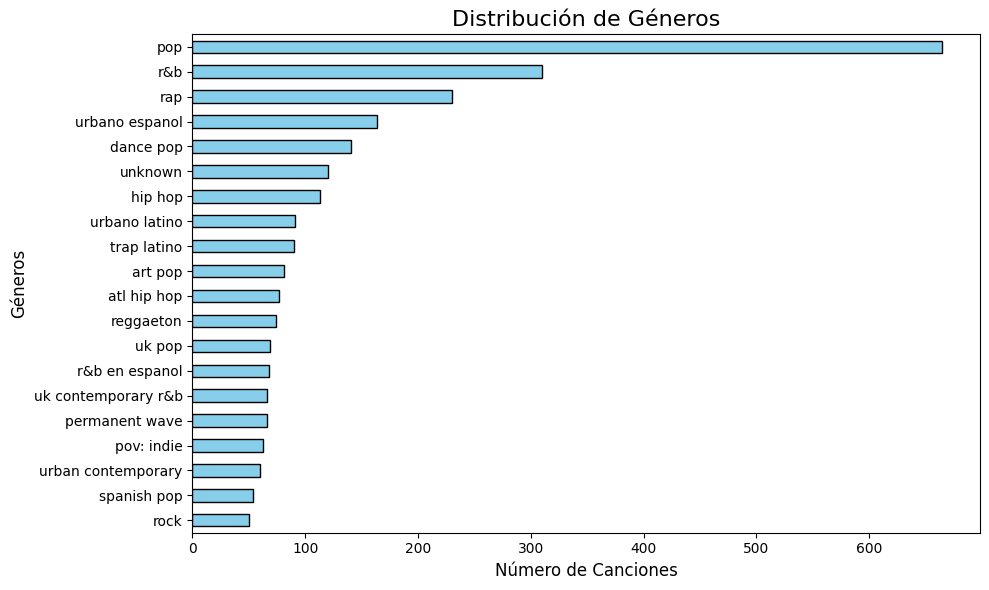

In [15]:
import matplotlib.pyplot as plt

def plot_genre_distribution(data, attribute, top_n=None):
    """
    Analiza y visualiza la distribución de géneros en un dataset.

    Args:
        data (DataFrame): El dataset que contiene los géneros.
        attribute (str): Nombre de la columna que contiene los géneros.
        top_n (int, opcional): Número máximo de géneros a mostrar.
    """
    # Contar la frecuencia de cada género
    genre_counts = (
        data[attribute]
        .apply(lambda x: list(x.values()) if isinstance(x, dict) else [])
        .explode()
        .value_counts()
    )
    
    # Mostrar solo los 'top_n' géneros más frecuentes (si se especifica)
    if top_n:
        genre_counts = genre_counts.head(top_n)

    # Crear el gráfico
    plt.figure(figsize=(10, 6))
    genre_counts.sort_values(ascending=True).plot(
        kind='barh', color='skyblue', edgecolor='black'
    )
    plt.title("Distribución de Géneros", fontsize=16)
    plt.xlabel("Número de Canciones", fontsize=12)
    plt.ylabel("Géneros", fontsize=12)
    plt.tight_layout()
    plt.show()

# Usamos la función con tu dataset
plot_genre_distribution(data_cleaned, 'genres', top_n=20)

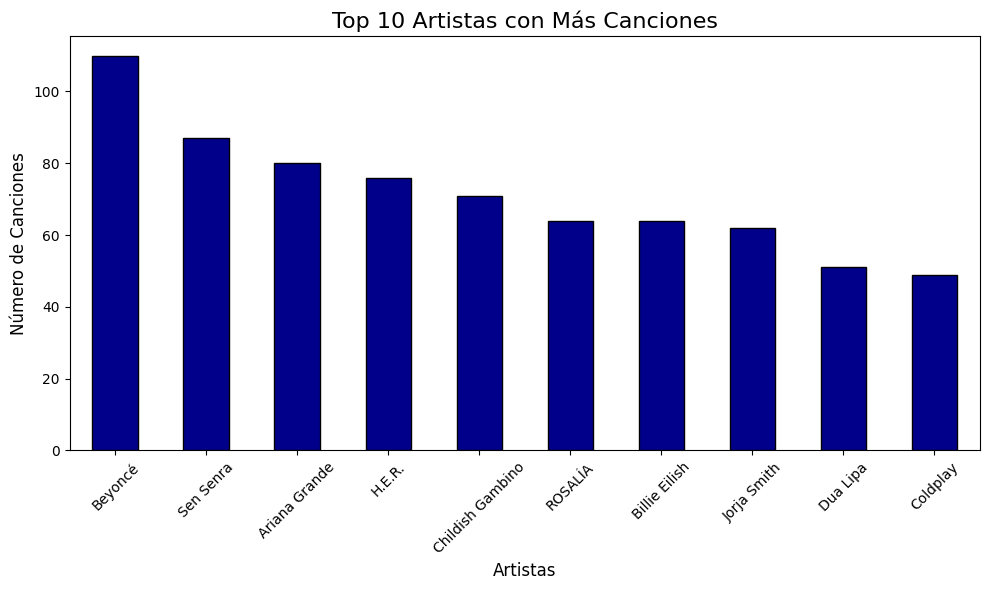

In [16]:
top_artists = data_cleaned['artist_name'].value_counts().head(10)

top_artists.plot(kind='bar', figsize=(10, 6), color='darkblue', edgecolor='black')
plt.title('Top 10 Artistas con Más Canciones', fontsize=16)
plt.xlabel('Artistas', fontsize=12)
plt.ylabel('Número de Canciones', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

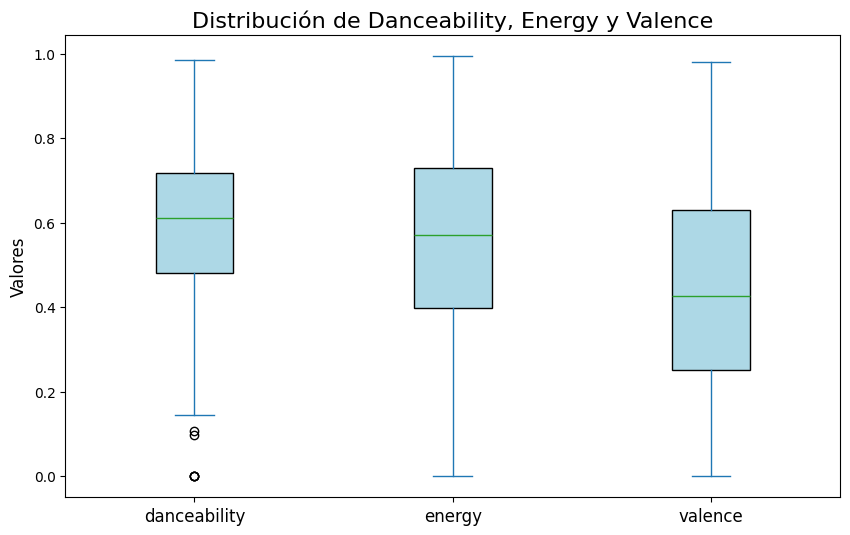

In [17]:
attributes = ['danceability', 'energy', 'valence']
data_cleaned[attributes].plot(kind='box', figsize=(10, 6), patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.title('Distribución de Danceability, Energy y Valence', fontsize=16)
plt.ylabel('Valores', fontsize=12)
plt.xticks(range(1, len(attributes) + 1), attributes, fontsize=12)
plt.show()

**CONTENT-BASED**

In [18]:
data_cleaned = data_cleaned.reset_index(drop=True)

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity


cv = CountVectorizer()
asm = cv.fit_transform(data_cleaned['artist_name']) #asm significa artists spare matrix

cosine_sim = cosine_similarity(asm, asm)

type(asm)

print(cosine_sim)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [20]:
def recommend_songs_same_artist(title, count=10):
    idx = data_cleaned[data_cleaned["song_name"] == title].index.tolist()[0]
    artist = data_cleaned.iloc[idx]["artist_name"]
    genres = data_cleaned.iloc[idx]["genres"]
    
    # Comprovar quantes cançons té l'artista
    artist_songs = data_cleaned[data_cleaned["artist_name"] == artist]
    
    # Si hi ha més d'una cançó de l'artista
    if len(artist_songs) > 1:
        print(f"Recomanant més cançons de l'artista {artist}:")
        artist_songs = artist_songs[artist_songs["song_name"] != title] # eliminar la cançó d'entrada de les possibles recomanacions
        recommended_songs = artist_songs["song_name"].iloc[:count]
    else:
        print(f"No hi ha més cançons disponibles de l'artista: {artist}. Recomanant cançons d'artistes similars de gèneres: {', '.join(genres.values())}:")
        
        # Buscar artistes amb els mateixos gèneres
        similar_artists = data_cleaned[data_cleaned["genres"].apply(lambda x: any(genre in x.values() for genre in genres.values()))]
        
        # Excloure l'artista actual de les recomanacions
        similar_artists = similar_artists[similar_artists["artist_name"] != artist]
        
        recommended_songs = similar_artists["song_name"].iloc[:count]
    
    return recommended_songs

recommend_songs_same_artist("End of Beginning", 5)


No hi ha més cançons disponibles de l'artista: Djo. Recomanant cançons d'artistes similars de gèneres: pov: indie, psychedelic pop:


19           Wait a Minute!
365                 Heather
383    Break My Heart Again
393                Memories
407             golden hour
Name: song_name, dtype: object

In [23]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\maram\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
from nltk.corpus import stopwords


songs = data_cleaned['song_name'].tolist()

# 1. Preprocessament de les dades (convertir a minúscules, netejar caràcters especials, etc.)
def preprocess_text(text):
    text = text.lower()  # Convertir a minúscules
    text = ''.join(e for e in text if e.isalnum() or e.isspace())  # Eliminar caràcters no alfanumèrics
    return text

songs = [preprocess_text(song) for song in songs]

# Crear una lista combinada de stopwords en varios idiomas
english_stopwords = set(stopwords.words('english'))
spanish_stopwords = set(stopwords.words('spanish'))
catalan_stopwords = set(stopwords.words('catalan'))

# Combinar todas las stopwords en un solo conjunto
all_stopwords = english_stopwords.union(spanish_stopwords, catalan_stopwords)

# Convertir el conjunto en una lista
all_stopwords = list(all_stopwords)

# Crear el vectorizador TF-IDF usando las stopwords personalizadas
vectorizer = TfidfVectorizer(stop_words=all_stopwords)

# Suponiendo que songs contiene los títulos de las canciones
tfidf_matrix = vectorizer.fit_transform(songs)


# 3. Funció de recomanació basada en similitud de cossinus
def recommend_similar_songs(query, n=10):
    query = preprocess_text(query)  # Preprocessar el títol de la cançó
    query_vector = vectorizer.transform([query])  # Convertir el títol a un vector TF-IDF
    
    # Calcular la similitud de cossinus entre la cançó de la consulta i totes les altres cançons
    similarities = cosine_similarity(query_vector, tfidf_matrix)
    
    # Ordenar les cançons per la similitud (en ordre descendent)
    similar_indices = similarities[0].argsort()[::-1][:n]  # Obtenim els índexs de les n més similars
    
    # Obtenir els noms de les cançons més similars
    similar_songs = [data_cleaned['song_name'].iloc[i] for i in similar_indices]
    song_similarities = similarities[0][similar_indices]  # Similitudes de les cançons
    
    # Mostrar les cançons i les seves similituds
    print(f"Cançons similars a '{query}':")
    for song, similarity in zip(similar_songs, song_similarities):
        print(f"- {song} (Similitud: {similarity:.4f})")

# 4. Exemple d'ús de la funció de recomanació
query_song = "can't friends"  # Aquí posaríem una part del nom de la cançó
recommendations = recommend_similar_songs(query_song, n=6)

Cançons similars a 'cant friends':
- we can't be friends (wait for your love) (Similitud: 0.7459)
- Friends (Similitud: 0.7071)
- ARE WE STILL FRIENDS? (Similitud: 0.5050)
- Better Friends (Similitud: 0.5050)
- Can't Help Me (Similitud: 0.4794)
- I Can't Breathe (Similitud: 0.4692)


In [ ]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler


def recommend_songs_by_sound_similarity(data:pd.DataFrame, song, artist):

    try:
        song_and_artist_data = data[(data["song_name"] == song ) & (data["artist_name"] == artist)]
        
        song_index = song_and_artist_data.index[0]

        similar_songs = data.copy()

        sound_properties = similar_songs.loc[:,["danceability", "energy", "valence", "tempo", "loudness", "key", "mode"]]

        scaler = MinMaxScaler()
        normalized_features = scaler.fit_transform(sound_properties) 

        similar_songs["Similarity with songs"] = cosine_similarity(normalized_features, normalized_features[song_index].reshape(1, -1)).squeeze() # afegit per provar lo de la normalitzacio

        similar_songs.rename(columns = {"song_name" : f"Songs similar to {song}"}, inplace = True)

        similar_songs = similar_songs.sort_values(by = "Similarity with songs", ascending = False)

        similar_songs = similar_songs[["artist_name", f"Songs similar to {song}", "Similarity with songs", "release_date", "popularity", "danceability", "energy", "valence", "tempo", "loudness", "key", "mode"]]

        similar_songs.reset_index(drop = True, inplace = True)

        return similar_songs.iloc[1:6]
    
    except:
        print("Oops! Aquesta cançó no esta inclosa al dataset")

In [27]:
recommend_songs_by_sound_similarity(data_cleaned, "Godspeed", "Frank Ocean")

,artist_name,Songs similar to Godspeed,Similarity with songs,release_date,popularity,danceability,energy,valence,tempo,loudness,key,mode
1,ROSALÍA,I See A Darkness,0.996240,2017-02-10,33,0.486,0.150,0.1250,111.468,-13.150,7,1
2,Ariana Grande,Intro,0.995558,2014-08-22,49,0.447,0.182,0.0959,89.601,-12.439,6,1
3,H.E.R.,For Anyone,0.995237,2021-06-18,18,0.440,0.101,0.1660,132.218,-13.021,7,1
4,Billie Eilish,THE GREATEST,0.995003,2024-05-17,82,0.407,0.192,0.1590,128.173,-10.990,7,1
5,Donny Hathaway,A Song for You,0.993575,1971,55,0.332,0.220,0.0719,100.196,-13.157,5,1


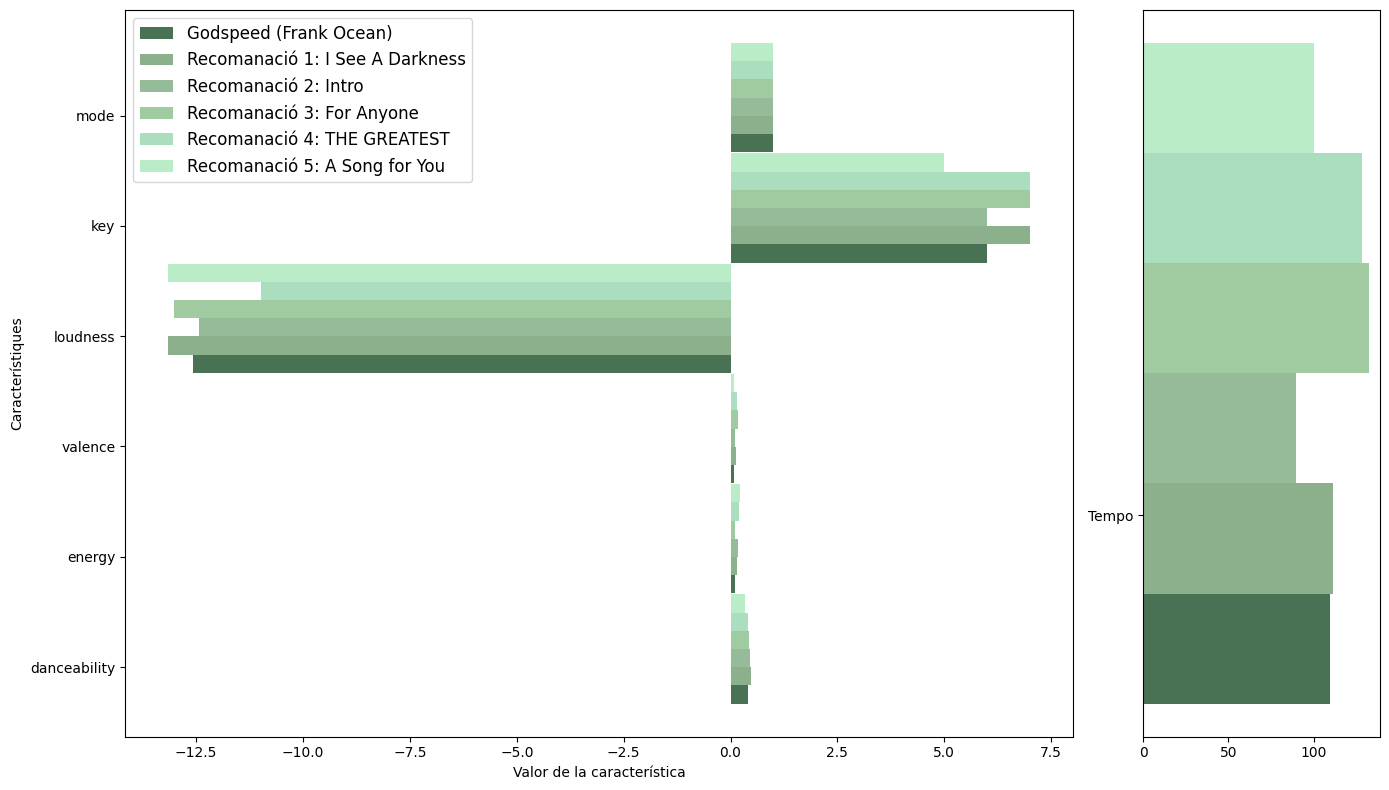

In [29]:
import matplotlib.pyplot as plt
import numpy as np

def plot_comparison_all_songs(data, song_name, artist_name, recommended_songs):
    required_columns_1 = ["danceability", "energy", "valence", "loudness", "key", "mode"]
    required_columns_2 = ["tempo"]

    selected_song_df = data.loc[data["song_name"] == song_name, required_columns_1 + required_columns_2]
    
    # Extraer los valores de las características de la canción seleccionada
    selected_song_values_1 = selected_song_df[required_columns_1].values.flatten()
    selected_song_values_2 = selected_song_df[required_columns_2].values.flatten()

    # Crear los valores para las canciones recomendadas
    recommended_songs_values_1 = recommended_songs[required_columns_1].values
    recommended_songs_values_2 = recommended_songs[required_columns_2].values

    # Crear los subgráficos (2 gráficos en 1 fila, el segundo gráfico será más pequeño)
    fig, axes = plt.subplots(1, 2, figsize=(14, 8), gridspec_kw={'width_ratios': [4, 1]})

    # Primer gráfico (sin 'tempo')
    bar_width = 0.165
    axes[0].barh(np.arange(len(required_columns_1)), selected_song_values_1, bar_width, label=f"{song_name} ({artist_name})", alpha=0.8, color='#1B4D29')  # Verde más fuerte
    colors = ['#5B8F5A', '#6A9F6D', '#78B67A', '#88D1A5', '#9DE4B0']
    for i, rec_song_values in enumerate(recommended_songs_values_1):
        axes[0].barh(np.arange(len(required_columns_1)) + (i + 1) * bar_width, rec_song_values, bar_width,
                    label=f"Recomanació {i+1}: {recommended_songs.iloc[i][f'Songs similar to {song_name}']}",
                    alpha=0.7, color=colors[i % len(colors)])
    #axes[0].set_title(f"Comparació de característiques: {song_name} vs Recomanacions")
    axes[0].set_xlabel("Valor de la característica")
    axes[0].set_ylabel("Característiques")
    axes[0].set_yticks(np.arange(len(required_columns_1)) + 0.25)
    axes[0].set_yticklabels(required_columns_1)
    axes[0].legend(loc="upper left", fontsize = 12)

    # Segundo gráfico (con 'tempo')
    axes[1].barh(np.arange(len(required_columns_2)), selected_song_values_2, bar_width, label=f"{song_name} ({artist_name})", alpha=0.8, color='#1B4D29')  # Verde más fuerte
    for i, rec_song_values in enumerate(recommended_songs_values_2):
        axes[1].barh(np.arange(len(required_columns_2)) + (i + 1) * bar_width, rec_song_values, bar_width,
                    label=f"Recomanació {i+1}: {recommended_songs.iloc[i][f'Songs similar to {song_name}']}",
                    alpha=0.7, color=colors[i % len(colors)])
    #axes[1].set_title(f"Comparació de tempo: {song_name} vs Recomanacions")
    #axes[1].set_xlabel("Valor de 'Tempo'")
    axes[1].set_yticks(np.arange(len(required_columns_2)) + 0.2)  
    axes[1].set_yticklabels(['Tempo'])

    axes[1].legend().set_visible(False)  
    plt.tight_layout()
    plt.show()


rec_songs = recommend_songs_by_sound_similarity(data_cleaned, "Godspeed", "Frank Ocean")

rec_songs = rec_songs[['Songs similar to Godspeed', 'danceability', 'energy', 'valence', 'loudness', 'key', 'mode', 'tempo']]

plot_comparison_all_songs(data_cleaned, "Godspeed", "Frank Ocean", rec_songs)

**COLLABORATIVE-FILTERING**

No executar la cel·la a continuació:

In [27]:
import pandas as pd


# Lista de IDs de las playlists (puedes agregar más IDs aquí)
playlist_ids = [
    "2q2ewNIP4taPggnaZOSbg1",
    "5De5GXu8JDAzlW9Pil3lJ5",
    "1hrzqg0Rt9oPJag1pAoco1",
    "1cJu4SkwdEfCinMa6q5d8A",
    "4vcba4wPNpwTdpwdUNkqHp",
    "67Xxu6FtLJPPy9DJdhTcwL",
    "1VljVIgweFULjOLFlnWGWK",
    "3tTDJLgqy2AShfMwOHACn9",
    "108QjcGHw0m8ZSoJmMgFxa",
    "33gKx9h8DvVX1iHDD2MPD8",
    "0GOK62T0HJdIjNyHjyVxEC",
    "4XFyUD5aaHfLsqTO1RHQQ2",
    "7mwPA4fD1rALXfZAfFwyLP",
    "2i0Hn8zaDMEmX7CNqfSlbB",
    "1gyl6vALuOeBwirtRROTY0",
    "42t5KqHOorwGB6YidRKG4A",
    "0k34qGCkXnRBswAjvvkvhV",
    "6Qg6yLELvIiquSwGCy23qY",
    "37TxwGiyOuQo9tadl8OLTV",
    "1RHXpibAztQJCo0YawcqNR",
    "2psf51hoo81XAQYMTH6Yr8"
    

]

# Lista para almacenar los datos de todas las playlists
all_data = []

# Conjunto para almacenar los IDs de las canciones procesadas y evitar duplicados
processed_ids = set()

# Recorrer cada playlist
for playlist_id in playlist_ids:
    # Obtener canciones de la playlist
    results = spotify.playlist_tracks(playlist_id)
    tracks = results['items']
    
    # Extraer los IDs de las canciones
    track_ids = [track['track']['id'] for track in tracks if track['track']]

    # Dividir los IDs en lotes de hasta 100 (Spotify API permite máximo 100 canciones por solicitud)
    chunk_size = 100
    chunks = [track_ids[i:i + chunk_size] for i in range(0, len(track_ids), chunk_size)]

    # Obtener características de audio para cada lote
    for chunk in chunks:
        audio_features = spotify.audio_features(chunk)
        
        for feature in audio_features:
            if feature:
                # Verificar si ya hemos procesado esta canción (comprobamos el ID)
                if feature['id'] not in processed_ids:
                    # Obtener nombre de la canción y el artista
                    track = spotify.track(feature['id'])
                    song_name = track['name']
                    artist_name = track['artists'][0]['name']  # Asumimos que hay un solo artista principal
                    popularity = track['popularity']
                    release_date = track['album']['release_date']  # Fecha de lanzamiento del álbum

                    # Obtener información del artista
                    artist_id = track['artists'][0]['id']
                    artist = spotify.artist(artist_id)  # Información del artista
                    genres = ", ".join(artist['genres'])  # Unir los géneros en una sola cadena


                    # Agregar los datos de la canción al listado
                    all_data.append({
                        "id": feature['id'],
                        "song_name": song_name,
                        "artist_name": artist_name,
                        "popularity": popularity,
                        "release_date": release_date,
                        "genres": genres,
                        "danceability": feature['danceability'],
                        "energy": feature['energy'],
                        "valence": feature['valence'],
                        "tempo": feature['tempo'],
                        "loudness": feature['loudness'],
                        "duration_ms": feature['duration_ms'],  # Duración en milisegundos
                        "key": feature['key'],  # Clave (0 = C, 1 = C#, ..., 11 = B)
                        "mode": feature['mode']  # Modo (0 = menor, 1 = mayor)
                    })

                    # Agregar el ID de la canción al conjunto para evitar duplicados
                    processed_ids.add(feature['id'])

# Convertir a DataFrame
df = pd.DataFrame(all_data)

# Guardar a CSV
df.to_csv("spotify_adrian_dataset.csv", index=False)


In [30]:
import pandas as pd
data_adrian = pd.read_csv("spotify_adrian_dataset.csv")

print(data_adrian.info())
print(data_adrian.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 884 entries, 0 to 883
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            884 non-null    object 
 1   song_name     884 non-null    object 
 2   artist_name   884 non-null    object 
 3   popularity    884 non-null    int64  
 4   release_date  884 non-null    object 
 5   genres        841 non-null    object 
 6   danceability  884 non-null    float64
 7   energy        884 non-null    float64
 8   valence       884 non-null    float64
 9   tempo         884 non-null    float64
 10  loudness      884 non-null    float64
 11  duration_ms   884 non-null    int64  
 12  key           884 non-null    int64  
 13  mode          884 non-null    int64  
dtypes: float64(5), int64(4), object(5)
memory usage: 96.8+ KB
None
       popularity  danceability      energy     valence       tempo  \
count  884.000000    884.000000  884.000000  884.000000  884.000000 

In [31]:
data_adrian['genres'] = data_adrian['genres'].fillna("unknown")  # Rellenar valores nulos en 'genres'
print(data_adrian.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 884 entries, 0 to 883
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            884 non-null    object 
 1   song_name     884 non-null    object 
 2   artist_name   884 non-null    object 
 3   popularity    884 non-null    int64  
 4   release_date  884 non-null    object 
 5   genres        884 non-null    object 
 6   danceability  884 non-null    float64
 7   energy        884 non-null    float64
 8   valence       884 non-null    float64
 9   tempo         884 non-null    float64
 10  loudness      884 non-null    float64
 11  duration_ms   884 non-null    int64  
 12  key           884 non-null    int64  
 13  mode          884 non-null    int64  
dtypes: float64(5), int64(4), object(5)
memory usage: 96.8+ KB
None


In [32]:
# Agrupar por canción y artista, y contar cuántas veces aparece cada combinación
duplicates = data_adrian.groupby(['song_name', 'artist_name']).size().reset_index(name='count')

# Filtrar combinaciones con más de un registro
duplicated_songs_artists = duplicates[duplicates['count'] > 1]

# Mostrar el número de duplicados y los detalles
print(f"Número de combinacions duplicades (song_name + artist_name): {len(duplicated_songs_artists)}")
print(duplicated_songs_artists)

Número de combinacions duplicades (song_name + artist_name): 30
                                             song_name          artist_name  \
15                                                A Mí               Rels B   
16                                       A les fosques              Julieta   
38                                            Amorfoda            Bad Bunny   
53                                       Avions volant              Julieta   
59                         BULERÍAS DE UN CABALLO MALO         Ralphie Choo   
74                                            Believer      Imagine Dragons   
139                                         Chulo pt.2             Bad Gyal   
163                                          Cutthroat      Imagine Dragons   
167                                             DIABLA          Figa Flawas   
175                                             Demons      Imagine Dragons   
231                                    Enamorada de tu             

In [33]:
# Agrupar por 'song_name' y 'artist_name' y quedarte con la fila de mayor popularidad
data_adrian_cleaned = (
    data_adrian.loc[data_adrian.groupby(['song_name', 'artist_name'])['popularity'].idxmax()]
)

# Verificar cambios
print(f"Número de filas originales: {len(data_adrian)}")
print(f"Número de filas después de limpiar duplicados: {len(data_adrian_cleaned)}")

# Opcional: mostrar las primeras filas
print(data_adrian_cleaned.head())
# Ordenar por el índice original
data_adrian_cleaned = data_adrian_cleaned.sort_index()

Número de filas originales: 884
Número de filas después de limpiar duplicados: 854
                         id                     song_name      artist_name  \
603  6z39NC4VSSweBHFg9kAoja                            #1  Imagine Dragons   
701  4wcBRRpIfesgcyUtis7PEg  1 step forward, 3 steps back   Olivia Rodrigo   
102  1aUGxXCz9QimNkKeiJtzZ7                   105 F Remix            KEVVO   
227  3KJ3opyV29269SXkPrc19l                           120        Bad Bunny   
669  4K3j4RfU2P4EX1yuLJSdkB                            15  The Space Ocean   

     popularity release_date  \
603           0   2021-09-03   
701          76   2021-05-21   
102          66   2019-09-12   
227          72   2020-11-27   
669          44         2020   

                                                genres  danceability  energy  \
603                             modern rock, pop, rock         0.692   0.695   
701                                                pop         0.473   0.203   
102  reggaeton,

In [34]:
# Extreure tots els gèneros únics
all_genres = data_adrian_cleaned['genres'].dropna().apply(lambda x: x.split(', ')).explode().unique()

# Crear un diccionari amb IDs únics per a cada gènere
genre_id_map = {idx: genre for idx, genre in enumerate(all_genres)}

# Invertir el diccionari (si es necessita buscar per nom)
genre_name_map = {genre: idx for idx, genre in genre_id_map.items()}

# Pas 2: Actualitzar la columna 'genres' perquè sigui un diccionario amb IDs i noms
def map_genres_to_ids(genre_string):
    if pd.isnull(genre_string):
        return {}  # Si no hi ha gènere, retornar un diccionari buit
    genres = genre_string.split(', ')
    return {genre_name_map[genre]: genre for genre in genres}

# Sobreesciure la columna 'genres'
data_adrian_cleaned['genres'] = data_adrian_cleaned['genres'].apply(map_genres_to_ids)

In [35]:
data_adrian_cleaned

,id,song_name,artist_name,popularity,release_date,genres,danceability,energy,valence,tempo,loudness,duration_ms,key,mode
0,2Fxmhks0bxGSBdJ92vM42m,bad guy,Billie Eilish,81,2019-03-29,"{0: 'art pop', 1: 'pop'}",0.701,0.425,0.5620,135.128,-10.965,194088,7,1
1,46lvmzK8wxAy66tjzXXSh0,Tal Vez,Paulo Londra,60,2019-04-03,"{2: 'argentine hip hop', 3: 'trap argentino', ...",0.849,0.655,0.7600,161.966,-2.899,264483,8,1
3,2huX4MIVEWQtzCpu6B05SV,No Te Preocupes por Mi,Leiva,0,2018-12-14,"{6: 'cantautor', 7: 'latin arena pop', 8: 'spa...",0.313,0.608,0.3410,151.872,-5.746,228326,7,1
4,1mlGScrDQqHqmhdIqE8MmA,Besos En Guerra,Morat,76,2018-10-25,"{11: 'colombian pop', 12: 'latin viral pop'}",0.691,0.973,0.7830,143.961,-3.586,231533,2,1
5,04u9U3bDD9dVZFDDI8v0ME,Paraíso,Dvicio,51,2014-09-08,"{7: 'latin arena pop', 13: 'latin pop', 9: 'sp...",0.643,0.891,0.9330,87.989,-3.343,180653,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
879,23IqxRsToCo4Oj9w1pK3PT,EL TEU AMOR,xicu,16,2023-05-03,"{31: 'indie catala', 216: 'musica catalana'}",0.647,0.890,0.0393,130.947,-4.733,205629,4,0
880,0uB9gsssuj6l3XLi25ADYl,2+1,Judeline,55,2023-10-05,{26: 'urbano espanol'},0.723,0.583,0.5070,97.706,-5.903,157727,0,0
881,4EF1UDALNWdyJDWindWBqg,Sustancia,Judeline,52,2021-04-23,{26: 'urbano espanol'},0.651,0.374,0.0797,120.136,-15.033,173684,0,1
882,0tHzUXLKk7p0wzMZMMEl8y,CANIJO,Judeline,56,2023-06-15,{26: 'urbano espanol'},0.577,0.467,0.4100,84.410,-8.496,141587,2,0


In [36]:
import numpy as np

np.random.seed(123)  # Establecer una semilla para reproducibilidad
data_adrian_cleaned['rating'] = np.round(np.random.uniform(2, 5, size=len(data_adrian_cleaned)), 1)

# Verificar los primeros valores del nuevo atributo
print(data_adrian_cleaned[['rating']].head())

data_adrian_cleaned

   rating
0     4.1
1     2.9
3     2.7
4     3.7
5     4.2


,id,song_name,artist_name,popularity,release_date,genres,danceability,energy,valence,tempo,loudness,duration_ms,key,mode,rating
0,2Fxmhks0bxGSBdJ92vM42m,bad guy,Billie Eilish,81,2019-03-29,"{0: 'art pop', 1: 'pop'}",0.701,0.425,0.5620,135.128,-10.965,194088,7,1,4.1
1,46lvmzK8wxAy66tjzXXSh0,Tal Vez,Paulo Londra,60,2019-04-03,"{2: 'argentine hip hop', 3: 'trap argentino', ...",0.849,0.655,0.7600,161.966,-2.899,264483,8,1,2.9
3,2huX4MIVEWQtzCpu6B05SV,No Te Preocupes por Mi,Leiva,0,2018-12-14,"{6: 'cantautor', 7: 'latin arena pop', 8: 'spa...",0.313,0.608,0.3410,151.872,-5.746,228326,7,1,2.7
4,1mlGScrDQqHqmhdIqE8MmA,Besos En Guerra,Morat,76,2018-10-25,"{11: 'colombian pop', 12: 'latin viral pop'}",0.691,0.973,0.7830,143.961,-3.586,231533,2,1,3.7
5,04u9U3bDD9dVZFDDI8v0ME,Paraíso,Dvicio,51,2014-09-08,"{7: 'latin arena pop', 13: 'latin pop', 9: 'sp...",0.643,0.891,0.9330,87.989,-3.343,180653,10,1,4.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
879,23IqxRsToCo4Oj9w1pK3PT,EL TEU AMOR,xicu,16,2023-05-03,"{31: 'indie catala', 216: 'musica catalana'}",0.647,0.890,0.0393,130.947,-4.733,205629,4,0,3.4
880,0uB9gsssuj6l3XLi25ADYl,2+1,Judeline,55,2023-10-05,{26: 'urbano espanol'},0.723,0.583,0.5070,97.706,-5.903,157727,0,0,3.2
881,4EF1UDALNWdyJDWindWBqg,Sustancia,Judeline,52,2021-04-23,{26: 'urbano espanol'},0.651,0.374,0.0797,120.136,-15.033,173684,0,1,4.4
882,0tHzUXLKk7p0wzMZMMEl8y,CANIJO,Judeline,56,2023-06-15,{26: 'urbano espanol'},0.577,0.467,0.4100,84.410,-8.496,141587,2,0,4.4


Combinem els dos datasets afegint una columna que indiqui l'usuari

In [37]:
data_cleaned['user'] = 0
data_adrian_cleaned['user'] = 1

combined_dataset = pd.concat([data_cleaned, data_adrian_cleaned], ignore_index = True)
combined_dataset

,id,song_name,artist_name,popularity,release_date,genres,danceability,energy,valence,tempo,loudness,duration_ms,key,mode,rating,user
0,34xTFwjPQ1dC6uJmleno7x,Godspeed,Frank Ocean,78,2016-08-20,"{0: 'lgbtq+ hip hop', 1: 'neo soul'}",0.399,0.0969,0.0758,109.540,-12.578,177922,6,1,3.1,0
1,2UJsKjM595pEyWUcd8JEIR,Fight For You - From the Original Motion Pictu...,H.E.R.,43,2021-02-04,"{2: 'r&b', 3: 'rap'}",0.695,0.6890,0.3920,95.013,-8.176,270710,2,1,4.9,0
2,0KS2h61pHQ4WmOwruD7uxD,Damage,H.E.R.,55,2020-10-21,"{2: 'r&b', 3: 'rap'}",0.646,0.6960,0.1800,81.336,-6.505,223415,1,1,4.2,0
3,2I88NEWpKrAPZuapXNV5G6,Belong to You (feat. 6LACK),Sabrina Claudio,55,2017-10-05,"{4: 'alternative r&b', 2: 'r&b'}",0.605,0.5530,0.6200,152.076,-10.845,185617,10,0,3.8,0
4,2UWnZrXLXIyfMgNvJr2KUa,By Any Means,Jorja Smith,50,2020-07-30,"{2: 'r&b', 5: 'uk contemporary r&b'}",0.750,0.4180,0.4420,104.981,-10.412,225631,11,1,2.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2832,23IqxRsToCo4Oj9w1pK3PT,EL TEU AMOR,xicu,16,2023-05-03,"{31: 'indie catala', 216: 'musica catalana'}",0.647,0.8900,0.0393,130.947,-4.733,205629,4,0,3.4,1
2833,0uB9gsssuj6l3XLi25ADYl,2+1,Judeline,55,2023-10-05,{26: 'urbano espanol'},0.723,0.5830,0.5070,97.706,-5.903,157727,0,0,3.2,1
2834,4EF1UDALNWdyJDWindWBqg,Sustancia,Judeline,52,2021-04-23,{26: 'urbano espanol'},0.651,0.3740,0.0797,120.136,-15.033,173684,0,1,4.4,1
2835,0tHzUXLKk7p0wzMZMMEl8y,CANIJO,Judeline,56,2023-06-15,{26: 'urbano espanol'},0.577,0.4670,0.4100,84.410,-8.496,141587,2,0,4.4,1


Fem recomanacions utilitzant el model SVD:

In [ ]:
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate
import statistics
from prettytable import PrettyTable

reader = Reader()

data_reader = Dataset.load_from_df(combined_dataset[["user", "id", "rating"]], reader)

svd = SVD()

results = cross_validate(svd, data_reader, measures=['RMSE', 'MAE'], cv=5)

# Calcular resultats de MAE

mae_results = list(map(lambda x: round(x, 2), results['test_mae']))

mae_mean = round(statistics.mean(mae_results), 2)

mae_std = round(statistics.stdev(mae_results), 4)

# Calcular resultats de RMSE

rmse_results = list(map(lambda x: round(x, 2), results['test_rmse']))

rmse_mean = round(statistics.mean(rmse_results), 2)

rmse_std = round(statistics.stdev(rmse_results), 4)

# Crear tabla per a mostrar els resultats

results_table = PrettyTable()

results_table.field_names = ["Metric", "Fold 1", "Fold 2", "Fold 3", "Fold 4", "Fold 5", "Mean", "Std"]

results_table.add_row(["MAE"] + mae_results + [mae_mean, mae_std])

results_table.add_row(["RMSE"] + rmse_results + [rmse_mean, rmse_std])

print(results_table)

+--------+--------+--------+--------+--------+--------+------+--------+
| Metric | Fold 1 | Fold 2 | Fold 3 | Fold 4 | Fold 5 | Mean |  Std   |
+--------+--------+--------+--------+--------+--------+------+--------+
|  MAE   |  0.73  |  0.74  |  0.79  |  0.77  |  0.75  | 0.76 | 0.0241 |
|  RMSE  |  0.85  |  0.86  |  0.9   |  0.88  |  0.87  | 0.87 | 0.0192 |
+--------+--------+--------+--------+--------+--------+------+--------+


In [44]:
train_set = data_reader.build_full_trainset()
svd = svd.fit(train_set)

Intentem predir alguns ratings i mirem com de bons són els resultats calculant el MAE i el RMSE.

In [45]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# User ID to get recommendations for
user_id = 1

# Filter the songs that the user has rated
songs_rated = combined_dataset[combined_dataset['user'] == user_id][['id', 'song_name', 'rating']]

# Predict the rating for each song using the SVD model
songs_rated['prediction'] = songs_rated['id'].apply(lambda x: svd.predict(user_id, x).est)

# Calculate Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE)
mae = mean_absolute_error(songs_rated['rating'], songs_rated['prediction'])
rmse = np.sqrt(mean_squared_error(songs_rated['rating'], songs_rated['prediction']))

# Show 10 random songs with their predicted ratings
print(songs_rated[['song_name', 'rating', 'prediction']].sample(10))

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


                     song_name  rating  prediction
2387              VISTA AL MAR     4.7    3.900005
2035  Solo (feat. Demi Lovato)     3.8    3.500203
2519                  SexeSexy     2.4    2.925573
2069                   Yyanosé     3.1    3.437064
2781          TOTAL90NOSTALGIA     3.2    3.286969
2342                     SAOKO     3.1    3.428165
2014              Stolen Dance     3.3    3.284960
2375                      Eros     4.8    3.779581
2613                    Tiptoe     3.4    3.547318
2008        Hijos de la Tierra     3.0    3.395602
Mean Absolute Error (MAE): 0.52
Root Mean Squared Error (RMSE): 0.61


In [46]:
def recommend_songs(user_id, n=10):
    if user_id not in combined_dataset['user'].unique():
        print(f"Error: El user_id {user_id} no està en el dataset.")
        return

    # Filtrar les cançons que l'usuari ha
    seen = combined_dataset[combined_dataset['user'] == user_id]['id'].to_list()
    
    # Crear una llista de cançons no escoltades per l'usuari
    not_seen = list(set(combined_dataset[combined_dataset['user'] != user_id]['id'].to_list()) - set(seen))
    
    # Crear un DataFrame par les cançons
    predicted_songs = pd.DataFrame(not_seen, columns=['id'])
    
    predicted_songs['song_name'] = predicted_songs['id'].apply(lambda x: combined_dataset[combined_dataset['id'] == x]['song_name'].values[0])
    
    predicted_songs['prediction'] = predicted_songs['id'].apply(lambda x: svd.predict(user_id, x).est)
    
    predicted_songs = predicted_songs.sort_values('prediction', ascending=False)
    predicted_songs = predicted_songs[['song_name', 'prediction']]
    predicted_songs = predicted_songs.set_index('song_name')
    
    # Imprimir las n mejores recomendaciones
    print(predicted_songs.head(n))

In [47]:
recommend_songs(1, 10)

                                                    prediction
song_name                                                     
Fight For You - From the Original Motion Pictur...    4.180110
Dembow y Reggaeton                                    4.060184
Sometimes                                             4.053866
Loco                                                  4.039843
V. 3005 - Beach Picnic Version                        4.039058
Tus Ojos                                              4.034406
Afterthought                                          4.032177
Wrong Places (from Songland)                          4.014805
Girl Like Me (feat. H.E.R.)                           4.008960
Casual                                                4.005738


**RECOMANACIONS AMB GRAPHS**

Per crear un recomanador de cançons amb grafs, vam crear més usuaris per obtenir uns millors resultats. Vam fer 13 particions del combined_dataset per obtenir aquests 13 usuaris. Ho vam realitzar amb solapament entre particions per tenir cançons repetides entre usuaris, per aconseguir un resultat més realista. 

No executar les dues ce·les següents:

In [ ]:
import pandas as pd
import numpy as np

# Eliminar las columnas 'rating' y 'user' del dataset original
dataset_reduced = combined_dataset.drop(columns=['rating', 'user'])

# Definir el número de particiones
num_partitions = 13

# Crear las particiones con tamaños y solapamientos variables
partitions = []
total_songs = len(dataset_reduced)

for i in range(num_partitions):
    # Generar un tamaño aleatorio para la partición (entre el 10% y el 30% del total)
    partition_size = np.random.randint(int(0.1 * total_songs), int(0.3 * total_songs))
    
    # Generar un índice de inicio aleatorio asegurando que no exceda el tamaño total
    start_index = np.random.randint(0, total_songs - partition_size)
    
    # Generar la partición con solapamientos variables
    end_index = start_index + partition_size
    partition = dataset_reduced.iloc[start_index:end_index].copy()
    
    # Agregar columna de usuario
    partition['user'] = i + 1  # Asignar el número de usuario correspondiente
    
    # Agregar columna de rating con valores aleatorios entre 2 y 5
    partition['rating'] = np.random.uniform(2, 5, len(partition)).round(1)
    
    partitions.append(partition)
    
    # Guardar cada partición como un nuevo dataset
    partition.to_csv(f"partition_{i+1}.csv", index=False)
    print(f"Partición {i+1} creada con {len(partition)} filas, guardada como 'partition_{i+1}.csv'")



In [ ]:
import pandas as pd

# Lista para almacenar cada partición
all_partitions = []

# Leer cada archivo CSV generado y añadirlo a la lista
for i in range(1, 14):  # Del 1 al 13
    partition = pd.read_csv(f"partition_{i}.csv")
    all_partitions.append(partition)

# Combinar todas las particiones en un único DataFrame
total_dataset = pd.concat(all_partitions, ignore_index=True)


# Opcional: guardar el dataset combinado en un archivo CSV
total_dataset.to_csv("total_dataset.csv", index=False)
print("Dataset combinado guardado como 'total_dataset.csv'.")


In [49]:
total_dataset = pd.read_csv("total_dataset.csv")

In [54]:
import networkx as nx
from collections import defaultdict

total_dataset = total_dataset[total_dataset['rating'] >= 3.5]


# Filtrar només les columnes necessàries
user_song_data = total_dataset[['user', 'song_name']]

# Inicialitzar un diccionari per guardar les co-aparicions entre cançons
pairs = defaultdict(int)

# Agrupar per usuari per trobar les cançons escoltades conjuntament
for user_id, group in user_song_data.groupby('user'):
    songs = list(group['song_name'])
    for i in range(len(songs)):
        for j in range(i + 1, len(songs)):
            # Incrementem el pes del parell de cançons
            pairs[(songs[i], songs[j])] += 1

# Crear el graf
G = nx.Graph()

# Afegir nodes i arestes amb pesos al graf
threshold = 2  # Llindar mínim per afegir una aresta
for (song1, song2), weight in pairs.items():
    if weight >= threshold:  # Només afegim connexions significatives
        G.add_edge(song1, song2, weight=weight)

# Mostra informació del graf
print(f"Nodes: {len(G.nodes())}, Arestes: {len(G.edges())}")
print("Exemples d'arestes:", list(G.edges(data=True))[:5])

Nodes: 1716, Arestes: 145900
Exemples d'arestes: [('my future', 'Dreams', {'weight': 2}), ('Dreams', 'Ghost in the Machine (feat. Phoebe Bridgers)', {'weight': 3}), ('Dreams', 'Into You', {'weight': 3}), ('Dreams', 'Moth To A Flame (with The Weeknd)', {'weight': 3}), ('Dreams', 'Stop The World I Wanna Get Off With You', {'weight': 3})]


In [55]:
from node2vec import Node2Vec

# Crear model Node2Vec
node2vec = Node2Vec(G, dimensions=64, walk_length=20, num_walks=200, p=2, q=1, workers=1)

# Entrenar el model
model = node2vec.fit(window=10, min_count=1, batch_words=4)

Computing transition probabilities:   0%|          | 0/1716 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 200/200 [04:22<00:00,  1.31s/it]


In [56]:
def recommend_song(song_name, n=5):
    # Verificar si la cançó existeix al graf
    if song_name not in G.nodes:
        return f"La cançó '{song_name}' no es troba al graf."
    
    # Obtenir el vector d'embeddding per a la cançó
    song_embedding = model.wv[song_name]
    
    # Obtenir les cançons més similars utilitzant el model Node2Vec
    similar_songs = model.wv.most_similar(song_name, topn=n)
    
    # Mostrar les recomanacions
    print(f"Recomanacions per '{song_name}':")
    for similar_song, similarity_score in similar_songs:
        print(f"- {similar_song}: {similarity_score:.2f}")
    
    return similar_songs


In [58]:
recommend_song("Waiting For My Moment", 5)

Recomanacions per 'Waiting For My Moment':
- This Is America: 0.97
- Burn: 0.96
- Trillion Girls (feat. Childish Gambino): 0.96
- Beautiful Little Fools: 0.96
- Still Down: 0.96


[('This Is America', 0.9654964208602905),
 ('Burn', 0.964596688747406),
 ('Trillion Girls (feat. Childish Gambino)', 0.9640952944755554),
 ('Beautiful Little Fools', 0.9620908498764038),
 ('Still Down', 0.9618809819221497)]